# Sprocket Central Pty Ltd Data Insights


* Analyze the customer and transaction data of Sprocket Central Pty Ltd 
  organization to optimize its marketing strategy. this project is done under
  the KPMG Data Analytics Consulting Internship which is designed to help 
  candidates gain a practical insight into the nature of work at KPMG
  company and to build career skills and experience. 

* We have reviewed the data sets and we discovered some data quality issues during the analysis. The summary table below highlights key quality issues :  



![](https://i.imgur.com/szK1Ojt.png)

## The Code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime, date

In [2]:
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')

In [3]:
NewCustomers = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')

In [4]:
AddressDf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

In [5]:
#Set first row as header

CustomerDemographic.columns = CustomerDemographic.iloc[0]
CustomerDemographic.drop(CustomerDemographic.index[0],inplace=True, axis = 0)

NewCustomers.columns = NewCustomers.iloc[0]
NewCustomers.drop(NewCustomers.index[0],inplace=True, axis = 0)

AddressDf.columns = AddressDf.iloc[0]
AddressDf.drop(AddressDf.index[0],inplace=True, axis = 0)

CustomerDemographic.head()

0 customer_id      first_name  last_name  gender  \
1           1         Laraine  Medendorp       F   
2           2             Eli    Bockman    Male   
3           3           Arlin     Dearle    Male   
4           4          Talbot        NaN    Male   
5           5  Sheila-kathryn     Calton  Female   

0 past_3_years_bike_related_purchases                  DOB  \
1                                  93  1953-10-12 00:00:00   
2                                  81  1980-12-16 00:00:00   
3                                  61  1954-01-20 00:00:00   
4                                  33  1961-10-03 00:00:00   
5                                  56  1977-05-13 00:00:00   

0               job_title job_industry_category     wealth_segment  \
1     Executive Secretary                Health      Mass Customer   
2  Administrative Officer    Financial Services      Mass Customer   
3      Recruiting Manager              Property      Mass Customer   
4                     NaN                    IT      Mass Customer   
5           Senior Editor                   NaN  Affluent Customer   

0 deceased_indicator                                            default  \
1                  N                                                 "'   
2                  N                       <script>alert('hi')</script>   
3                  N                                2018-02-01 00:00:00   
4                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
5                  N                                                NIL   

0 owns_car tenure  
1      Yes     11  
2      Yes     16  
3      Yes     15  
4       No      7  
5      Yes      8

In [6]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [7]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

Values in the "default" column are not correct, we should drop this column

In [8]:
CustomerDemographic= CustomerDemographic.drop('default', axis=1)
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

In [9]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [10]:
#The column has inconsistent values, we need to replace inconsistent values with appropriate values

CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
CustomerDemographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [11]:
CustomerDemographic.describe()

0       customer_id first_name last_name  gender  \
count          4000       4000      3875    4000   
unique         4000       3139      3725       3   
top               1        Max  Pristnor  Female   
freq              1          5         3    2039   

0       past_3_years_bike_related_purchases                  DOB  \
count                                  4000                 3913   
unique                                  100                 3448   
top                                      16  1978-01-30 00:00:00   
freq                                     56                    7   

0                                  job_title job_industry_category  \
count                                   3494                  3344   
unique                                   195                     9   
top     Business Systems Development Analyst         Manufacturing   
freq                                      45                   799   

0      wealth_segment deceased_indicator owns_car  tenure  
count            4000               4000     4000    3913  
unique              3                  2        2      22  
top     Mass Customer                  N      Yes       7  
freq             2000               3998     2024     235

In [12]:
CustomerDemographic.describe(include='object')

0       customer_id first_name last_name  gender  \
count          4000       4000      3875    4000   
unique         4000       3139      3725       3   
top               1        Max  Pristnor  Female   
freq              1          5         3    2039   

0       past_3_years_bike_related_purchases                  DOB  \
count                                  4000                 3913   
unique                                  100                 3448   
top                                      16  1978-01-30 00:00:00   
freq                                     56                    7   

0                                  job_title job_industry_category  \
count                                   3494                  3344   
unique                                   195                     9   
top     Business Systems Development Analyst         Manufacturing   
freq                                      45                   799   

0      wealth_segment deceased_indicator owns_car  tenure  
count            4000               4000     4000    3913  
unique              3                  2        2      22  
top     Mass Customer                  N      Yes       7  
freq             2000               3998     2024     235

In [13]:
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])

CustomerDemographic["age"] = CustomerDemographic["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


C:\Users\ibtis\AppData\Local\Temp\ipykernel_11812\2158732806.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  CustomerDemographic["age"] = CustomerDemographic["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


In [14]:
CustomerDemographic

0    customer_id      first_name  last_name       gender  \
1              1         Laraine  Medendorp       Female   
2              2             Eli    Bockman         Male   
3              3           Arlin     Dearle         Male   
4              4          Talbot        NaN         Male   
5              5  Sheila-kathryn     Calton       Female   
...          ...             ...        ...          ...   
3996        3996         Rosalia   Halgarth       Female   
3997        3997          Blanch     Nisuis       Female   
3998        3998          Sarene    Woolley  Unspecified   
3999        3999       Patrizius        NaN         Male   
4000        4000           Kippy    Oldland         Male   

0    past_3_years_bike_related_purchases        DOB               job_title  \
1                                     93 1953-10-12     Executive Secretary   
2                                     81 1980-12-16  Administrative Officer   
3                                     61 1954-01-20      Recruiting Manager   
4                                     33 1961-10-03                     NaN   
5                                     56 1977-05-13           Senior Editor   
...                                  ...        ...                     ...   
3996                                   8 1975-08-09   VP Product Management   
3997                                  87 2001-07-13         Statistician II   
3998                                  60        NaT       Assistant Manager   
3999                                  11 1973-10-24                     NaN   
4000                                  76 1991-11-05    Software Engineer IV   

0    job_industry_category     wealth_segment deceased_indicator owns_car  \
1                   Health      Mass Customer                  N      Yes   
2       Financial Services      Mass Customer                  N      Yes   
3                 Property      Mass Customer                  N      Yes   
4                       IT      Mass Customer                  N       No   
5                      NaN  Affluent Customer                  N      Yes   
...                    ...                ...                ...      ...   
3996                Health      Mass Customer                  N       No   
3997         Manufacturing     High Net Worth                  N      Yes   
3998                    IT     High Net Worth                  N       No   
3999         Manufacturing  Affluent Customer                  N      Yes   
4000                   NaN  Affluent Customer                  N       No   

0    tenure   age  
1        11  69.0  
2        16  42.0  
3        15  68.0  
4         7  61.0  
5         8  45.0  
...     ...   ...  
3996     19  47.0  
3997      1  21.0  
3998    NaN   NaN  
3999     10  49.0  
4000     11  31.0  

[4000 rows x 13 columns]

In [15]:
CustomerDemographic.age.max()
#a 178 years old customer, 

179.0

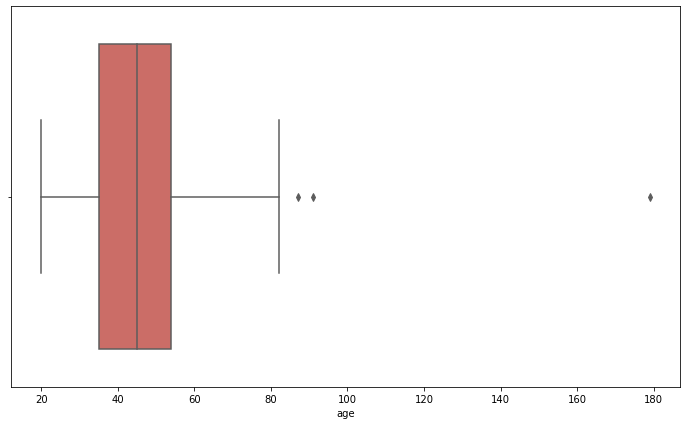

In [16]:

#the boxplot() use the turkey method (outlier are less than Q1-1.5IQR and greater than Q3+1.5IQR)
for cat in ['age']:
    plt.figure(figsize=(12,7))
    sns.boxplot(x=cat,data=CustomerDemographic,palette='hls');
    

In [17]:
CustomerDemographic.loc[CustomerDemographic['age'] > 85]

0    customer_id first_name last_name       gender  \
34            34   Jephthah  Bachmann  Unspecified   
720          720     Darrel     Canet         Male   
1092        1092     Katlin   Creddon       Female   

0    past_3_years_bike_related_purchases        DOB           job_title  \
34                                    59 1843-12-21     Legal Assistant   
720                                   67 1931-10-23  Recruiting Manager   
1092                                  56 1935-08-22  VP Quality Control   

0    job_industry_category     wealth_segment deceased_indicator owns_car  \
34                      IT  Affluent Customer                  N       No   
720                 Retail  Affluent Customer                  N       No   
1092                Retail      Mass Customer                  N       No   

0    tenure    age  
34       20  179.0  
720       6   91.0  
1092      5   87.0

In [18]:
CustomerDemographic = CustomerDemographic.drop(labels=[33,719,1091], axis=0)


In [19]:
CustomerDemographic.shape

(3997, 13)

In [20]:
CustomerDemographic = pd.merge(CustomerDemographic, AddressDf,how='inner',on='customer_id')

In [21]:
CustomerDemographic.shape

(3993, 18)

In [22]:
CustomerDemographic['state'].value_counts()

NSW                2052
VIC                 938
QLD                 836
New South Wales      85
Victoria             82
Name: state, dtype: int64

In [23]:
#The column has inconsistent values, we need to replace inconsistent values with appropriate values
CustomerDemographic['state'] = CustomerDemographic['state'].replace('Victoria','VIC').replace('New South Wales','NSW')
CustomerDemographic['state'].value_counts()

NSW    2137
VIC    1020
QLD     836
Name: state, dtype: int64

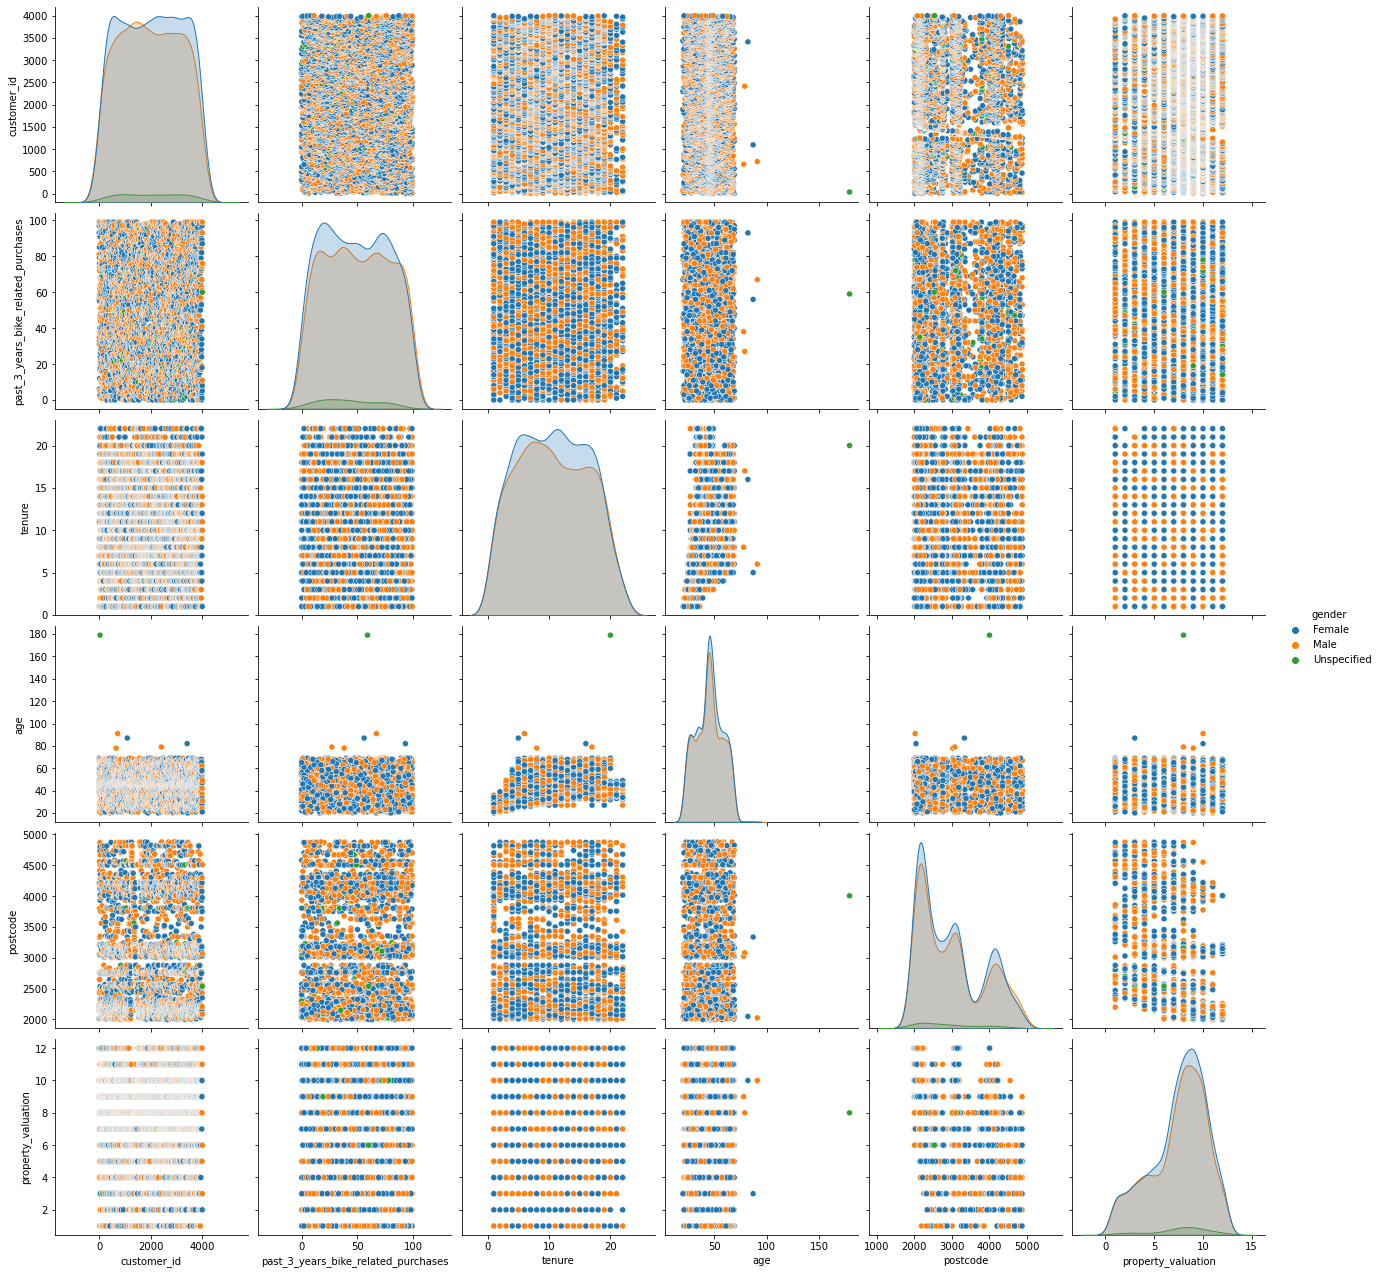

In [24]:
sns.pairplot(CustomerDemographic[CustomerDemographic.columns],hue='gender',height=3);

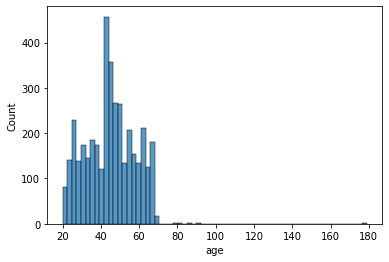

In [25]:
plot = sns.histplot(CustomerDemographic['age'])

In [26]:
NewCustomers
NewCustomers["DOB"] = pd.to_datetime(NewCustomers["DOB"])
NewCustomers["age"] = NewCustomers["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


C:\Users\ibtis\AppData\Local\Temp\ipykernel_11812\1681689752.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  NewCustomers["age"] = NewCustomers["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


In [27]:
NewCustomers

0    first_name  last_name  gender past_3_years_bike_related_purchases  \
1       Chickie    Brister    Male                                  86   
2         Morly     Genery    Male                                  69   
3       Ardelis  Forrester  Female                                  10   
4        Lucine      Stutt  Female                                  64   
5       Melinda     Hadlee  Female                                  34   
...         ...        ...     ...                                 ...   
996   Ferdinand  Romanetti    Male                                  60   
997        Burk    Wortley    Male                                  22   
998    Melloney      Temby  Female                                  17   
999      Dickie    Cubbini    Male                                  30   
1000      Sylas    Duffill    Male                                  56   

0           DOB                     job_title job_industry_category  \
1    1957-07-12               General Manager         Manufacturing   
2    1970-03-22           Structural Engineer              Property   
3    1974-08-28        Senior Cost Accountant    Financial Services   
4    1979-01-28    Account Representative III         Manufacturing   
5    1965-09-21             Financial Analyst    Financial Services   
...         ...                           ...                   ...   
996  1959-10-07                     Paralegal    Financial Services   
997  2001-10-17        Senior Sales Associate                Health   
998  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
999  1952-12-17             Financial Advisor    Financial Services   
1000 1955-10-02           Staff Accountant IV              Property   

0        wealth_segment deceased_indicator owns_car  ...    country  \
1         Mass Customer                  N      Yes  ...  Australia   
2         Mass Customer                  N       No  ...  Australia   
3     Affluent Customer                  N       No  ...  Australia   
4     Affluent Customer                  N      Yes  ...  Australia   
5     Affluent Customer                  N       No  ...  Australia   
...                 ...                ...      ...  ...        ...   
996   Affluent Customer                  N       No  ...  Australia   
997       Mass Customer                  N       No  ...  Australia   
998   Affluent Customer                  N      Yes  ...  Australia   
999       Mass Customer                  N      Yes  ...  Australia   
1000      Mass Customer                  N      Yes  ...  Australia   

0    property_valuation   NaN     NaN       NaN       NaN     NaN  Rank  \
1                     6  0.56  0.7000  0.875000  0.743750     1.0     1   
2                    11  0.89  0.8900  1.112500  0.945625     1.0     1   
3                     5  1.01  1.0100  1.010000  1.010000     1.0     1   
4                     1  0.87  1.0875  1.087500  1.087500     4.0     4   
5                     9  0.52  0.5200  0.650000  0.650000     4.0     4   
...                 ...   ...     ...       ...       ...     ...   ...   
996                   7  0.79  0.7900  0.790000  0.790000   996.0   996   
997                  10  0.76  0.7600  0.950000  0.807500   997.0   997   
998                   2  0.85  1.0625  1.062500  1.062500   997.0   997   
999                   2  1.09  1.3625  1.362500  1.158125   997.0   997   
1000                  9  0.47  0.5875  0.734375  0.624219  1000.0  1000   

0        Value   age  
1      1.71875  65.0  
2      1.71875  52.0  
3      1.71875  48.0  
4     1.703125  43.0  
5     1.703125  57.0  
...        ...   ...  
996      0.374  63.0  
997      0.357  21.0  
998      0.357  68.0  
999      0.357  70.0  
1000      0.34  67.0  

[1000 rows x 24 columns]

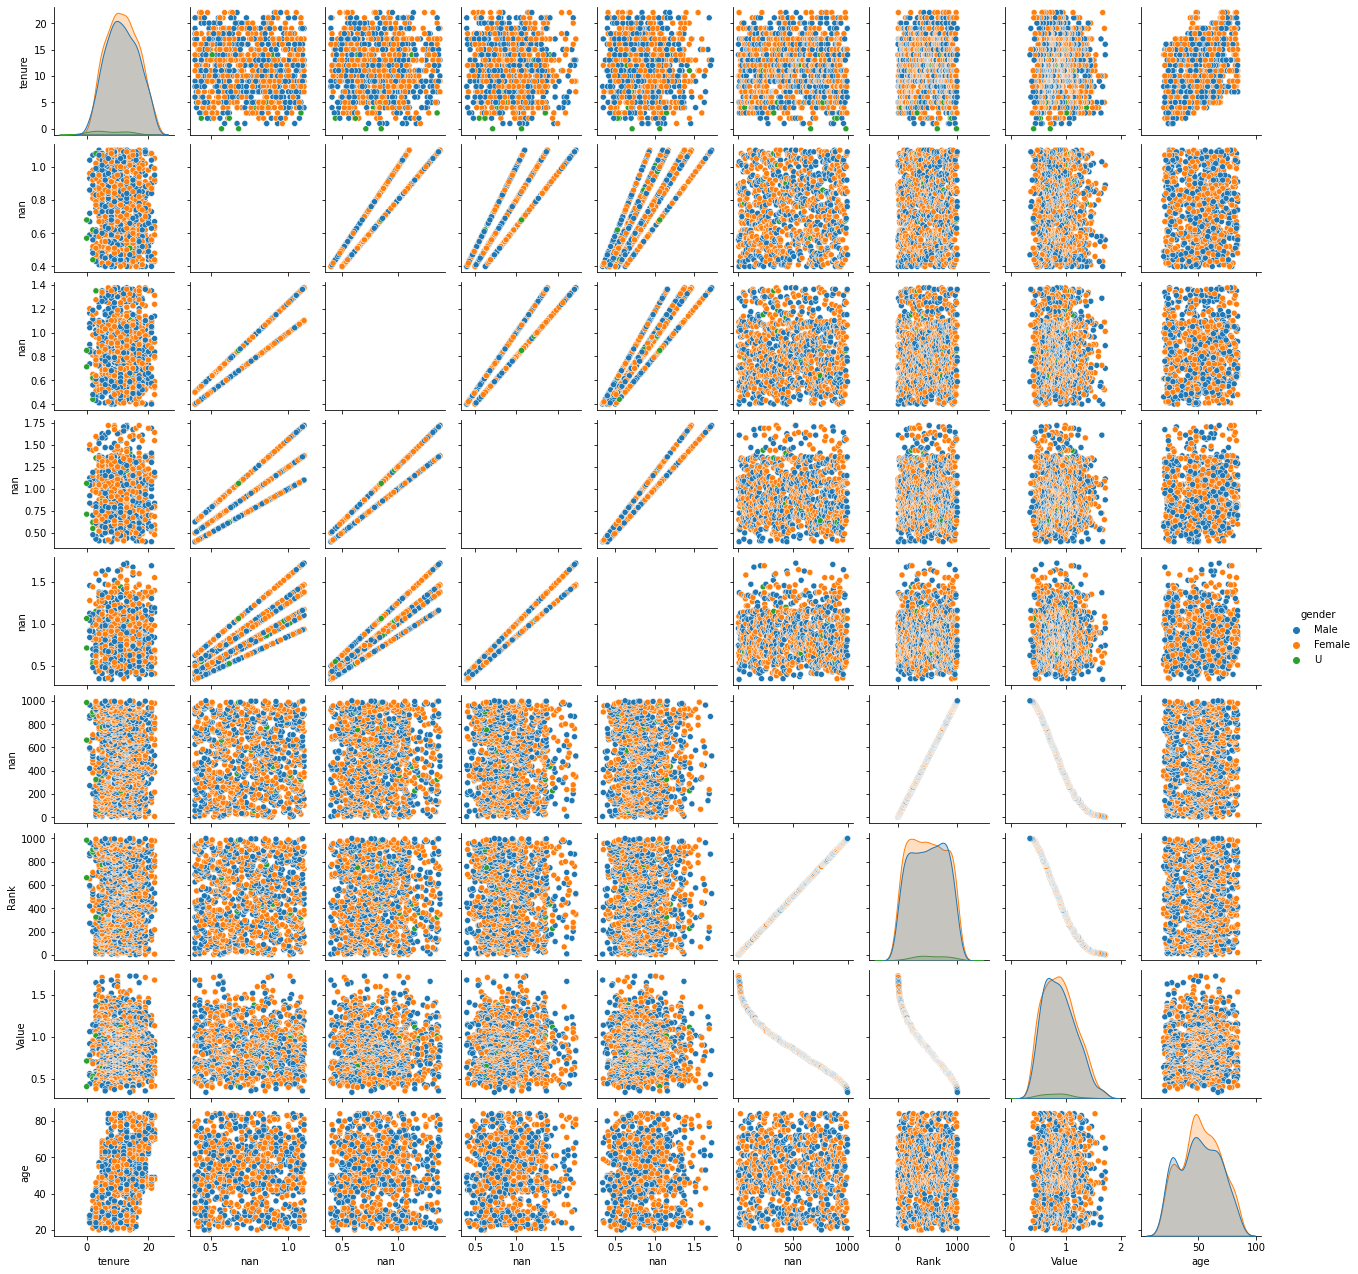

In [28]:
sns.pairplot(NewCustomers[NewCustomers.columns],hue='gender',height=2);

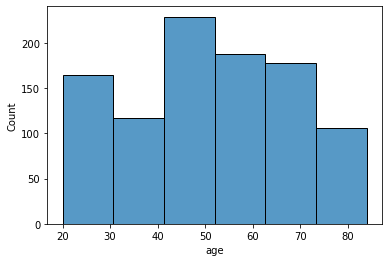

In [29]:
plot = sns.histplot(NewCustomers['age'],bins=6)

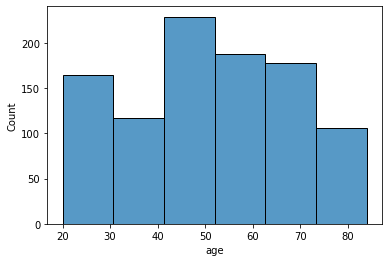

In [30]:
plot = sns.histplot(NewCustomers['age'],bins=6)

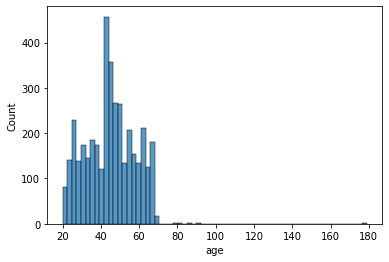

In [31]:
plot = sns.histplot(CustomerDemographic['age'])

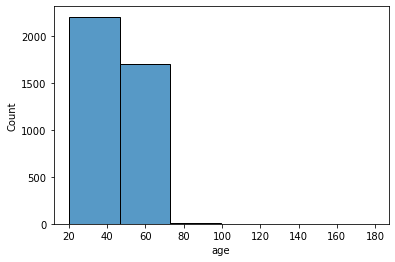

In [32]:
plot = sns.histplot(CustomerDemographic['age'],bins=6)

Most customer are aged between 40-50 (both  new customer and the old customers)
For the new customers the lowest age groups are under 20 and uper 80
For the old customers the lowest age groups are under 20 and uper 69
The new customers: age groups 39-49 are most populated(also 50-69).
The old customers:age groups 39-49 are most populated.
most of customer are female 

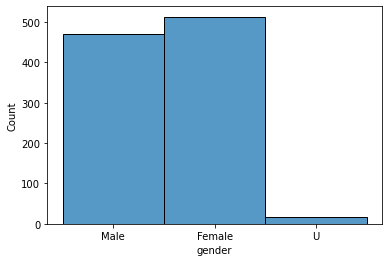

In [33]:
plot = sns.histplot(NewCustomers['gender'])

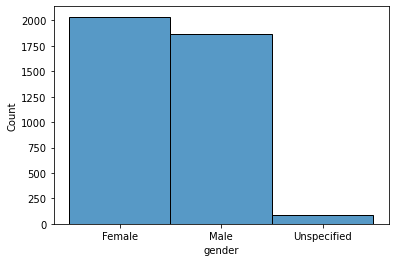

In [34]:
plot = sns.histplot(CustomerDemographic['gender'])

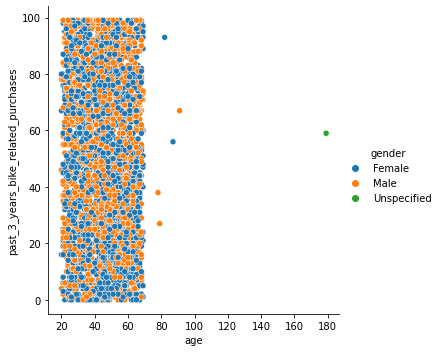

In [35]:
plot1 = sns.relplot(x="age", y="past_3_years_bike_related_purchases", hue = 'gender', data=CustomerDemographic)

In [36]:
tab1 = CustomerDemographic.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
tab2 = NewCustomers.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()


In [37]:
tab1

count
gender            
Female       98231
Male         93314
Unspecified   3718

In [38]:
tab2

count
gender                                                   
Female  1064343974383261836525781971844562882748732479...
Male    8669235072944860881144261170717658446476126062...
U                        53569657166529369154320628824082

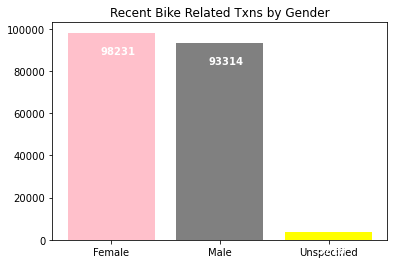

In [39]:
labels = ['Female', 'Male','Unspecified']
plt.bar(labels, tab1['count'], color=['pink','grey','yellow'])
for i, v in enumerate(tab1['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

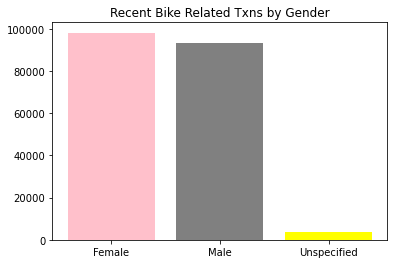

In [40]:
labels = ['Female', 'Male','Unspecified']
plt.bar(labels, tab1['count'], color=['pink','grey','yellow'])
plt.title('Recent Bike Related Txns by Gender')
plt.show()

both old and new customers are mostly Female(25212 bikes for new and 98303bikes purchases )
and for Male :23765 bikes for new customers and 93415bikes for old cutomes



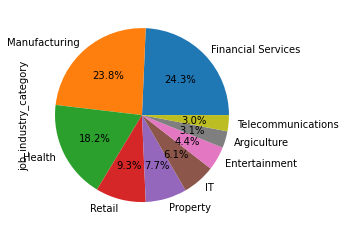

In [41]:

NewCustomers.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()

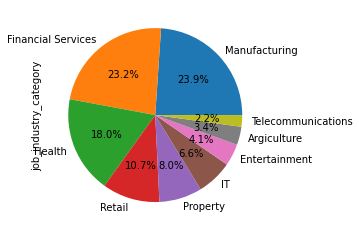

In [42]:

CustomerDemographic.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()

For both New and old customers:Financial Services, Manufacturing, and Health are the top three profit-generating industries,followed by retail and property.

The smallest number of customers are in Agriculture and Telecommunications

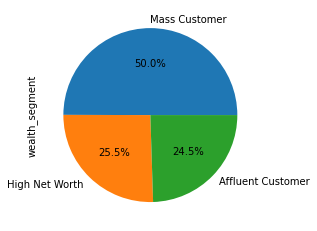

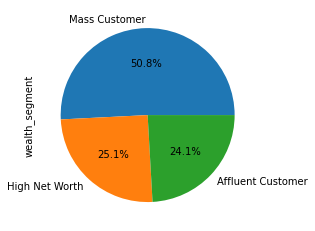

In [43]:
CustomerDemographic.wealth_segment.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()
NewCustomers.wealth_segment.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()

for the social class,the number of Mass Customers is the highest(we should focus on this class fellowed by High net customers and then the affluent cutomers)


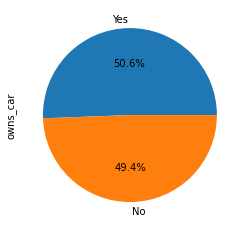

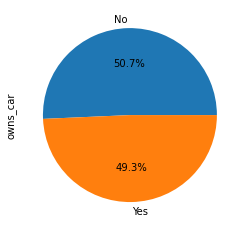

In [44]:
CustomerDemographic.owns_car.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()
NewCustomers.owns_car.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 1)) + '%')
plt.show()

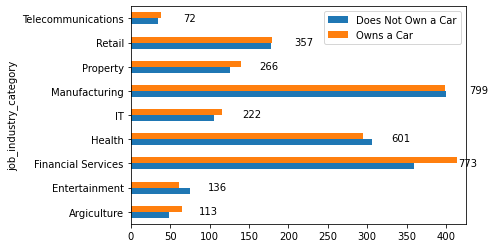

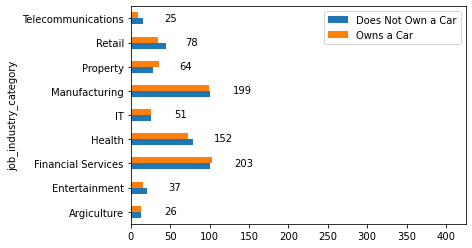

In [45]:
CustomerDemographic.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(CustomerDemographic.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()




NewCustomers.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(NewCustomers.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

customers who worked in financial services are most likely to own a car(old cutomers)

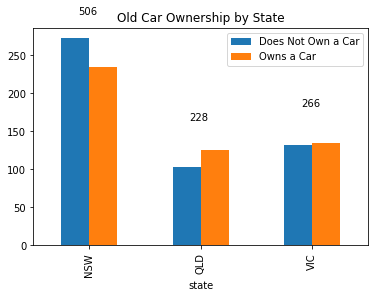

In [46]:
NewCustomers.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(NewCustomers.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

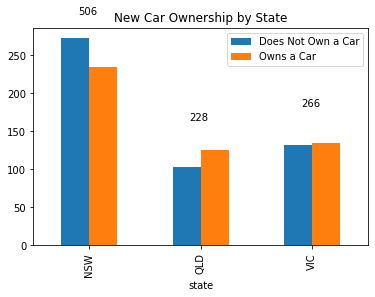

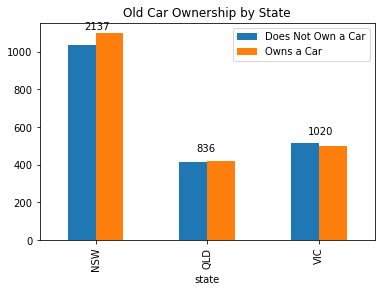

In [47]:
NewCustomers.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(NewCustomers.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
plt.title('New Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


CustomerDemographic.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(CustomerDemographic.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/9/9d/KPMG_logo.svg)